In [133]:
import sys
import pandas as pd
import requests as req
from requests_oauthlib import OAuth1 

In [5]:
sys.path.append('..')

from config import *

In [7]:
oauth = OAuth1(
    key,
    client_secret=secret,
    resource_owner_key=access_oauth_token,
    resource_owner_secret=access_oauth_token_secret)

In [10]:
identity_url = 'https://api.discogs.com/oauth/identity'
res = req.get(identity_url, auth=oauth)
res

<Response [200]>

In [13]:
username = res.json()['username']

In [26]:
url = 'https://api.discogs.com/inventory/export'
res = req.get(url, auth=oauth)
res

<Response [200]>

In [29]:
res.json().keys()

dict_keys(['pagination', 'items'])

In [34]:
url = 'https://api.discogs.com/inventory/export/5888824/download'
res = req.get(url, auth=oauth)
res

<Response [200]>

In [77]:
csv_content = res.content


In [80]:
decoded_content = csv_content.decode('latin1')  # Decode bytes to string assuming UTF-8 encoding

In [83]:
type(decoded_content)

str

In [95]:
import zipfile
import io

# Assuming 'decoded_content' contains the binary data of a ZIP file
with zipfile.ZipFile(io.BytesIO(csv_content)) as z:
    z.extractall('destination_folder/')

In [96]:
df = pd.read_csv('destination_folder/ElArticoDiscos-inventory-20230927-1003.csv')

In [98]:
df.head()

,listing_id,artist,title,label,catno,format,release_id,status,price,listed,comments,media_condition,sleeve_condition,accept_offer,external_id,weight,format_quantity,location
0,1161793621,King Tutt,Comin' Out / Even Though,T.K. Disco,458,"12""",694699,Sold,6.00,2021-03-17 06:25:42,Original T.K. Disco Sleeve,Near Mint (NM or M-),Generic,Y,NaN,230,1,039
1,1364731297,King Crimson,In The Court Of The Crimson King,"Polydor, EG",800 030-2,"CD, Album, RE",2981367,Sold,17.00,2021-03-17 07:05:50,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda12
2,1287142647,David S. Ware String Ensemble,Threads,Thirsty Ear,THI57137.2,"CD, Album",1099653,Sold,11.00,2021-03-17 07:08:13,SEALED (Precintado),Mint (M),Mint (M),Y,NaN,85,1,HCajón01
3,1287144780,David Eyges,The Captain,MidLantic Records,MR2002-103,"CD, Album, RE",10108236,Sold,9.99,2021-03-17 07:08:14,Almost like new. Private Collection. Close to ...,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HCajón01
4,1362016279,"Dmitri Shostakovich, Государственный Симфониче...","Symphony No 5 In D Minor Op 47, Symphony No 9 ...",Olympia (2),OCD 113,CD,10422040,Sold,9.99,2021-03-17 07:08:14,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda20


In [100]:
df.status.value_counts()

status
For Sale     42471
Sold         12734
Draft           10
Violation        1
Expired          1
Name: count, dtype: int64

In [105]:
sold = df[df['status']=='Sold']

In [109]:
sold.head()

,listing_id,artist,title,label,catno,format,release_id,status,price,listed,comments,media_condition,sleeve_condition,accept_offer,external_id,weight,format_quantity,location
0,1161793621,King Tutt,Comin' Out / Even Though,T.K. Disco,458,"12""",694699,Sold,6.00,2021-03-17 06:25:42,Original T.K. Disco Sleeve,Near Mint (NM or M-),Generic,Y,NaN,230,1,039
1,1364731297,King Crimson,In The Court Of The Crimson King,"Polydor, EG",800 030-2,"CD, Album, RE",2981367,Sold,17.00,2021-03-17 07:05:50,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda12
2,1287142647,David S. Ware String Ensemble,Threads,Thirsty Ear,THI57137.2,"CD, Album",1099653,Sold,11.00,2021-03-17 07:08:13,SEALED (Precintado),Mint (M),Mint (M),Y,NaN,85,1,HCajón01
3,1287144780,David Eyges,The Captain,MidLantic Records,MR2002-103,"CD, Album, RE",10108236,Sold,9.99,2021-03-17 07:08:14,Almost like new. Private Collection. Close to ...,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HCajón01
4,1362016279,"Dmitri Shostakovich, Государственный Симфониче...","Symphony No 5 In D Minor Op 47, Symphony No 9 ...",Olympia (2),OCD 113,CD,10422040,Sold,9.99,2021-03-17 07:08:14,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda20


In [118]:
sold.listed.info()

<class 'pandas.core.series.Series'>
Index: 12734 entries, 0 to 54112
Series name: listed
Non-Null Count  Dtype         
--------------  -----         
12734 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 199.0 KB


In [122]:
sold['listed'] = pd.to_datetime(sold['listed'])

/var/folders/h7/xhgpgb3d0s55331krx9jbrv80000gn/T/ipykernel_10308/1696982973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold['listed'] = pd.to_datetime(sold['listed'])


In [129]:
sold['año'] = sold.listed.dt.year

/var/folders/h7/xhgpgb3d0s55331krx9jbrv80000gn/T/ipykernel_10308/3079341462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold['año'] = sold.listed.dt.year


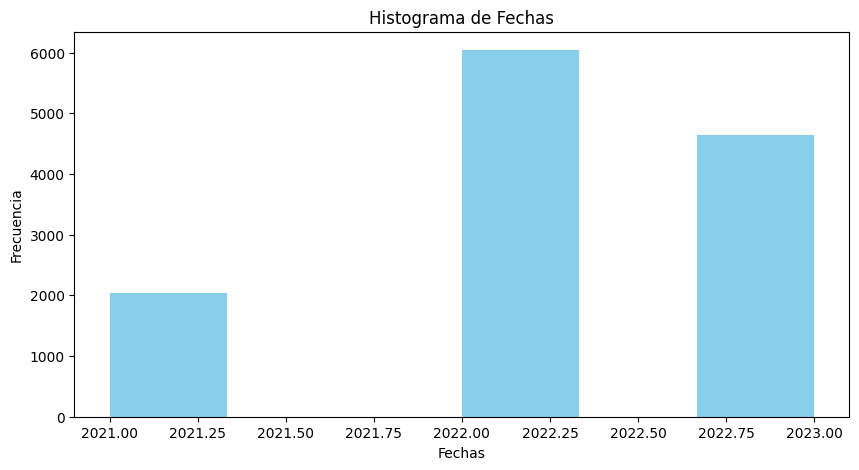

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(sold['año'], bins=6, color='skyblue')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fechas')
plt.show();

In [138]:
url = 'https://api.discogs.com/inventory/upload'
res = req.get(url, auth=oauth)
res

<Response [200]>

In [144]:
res.json()['items']

[{'created_ts': '2021-01-17T14:41:31',
  'filename': 'discosvinilosgalicia-inventory-20210117-1438.csv',
  'finished_ts': '2021-01-17T14:41:33',
  'results': 'CSV file contains 52 records.<p>Processed 51 records.',
  'status': 'success',
  'id': 238458,
  'type': 'add'},
 {'created_ts': '2021-01-17T14:56:42',
  'filename': 'discosvinilosgalicia-inventory-20210117-1438.csv',
  'finished_ts': '2021-01-17T14:56:43',
  'results': 'CSV file contains 81 records.<p>Processed 80 records.',
  'status': 'success',
  'id': 238461,
  'type': 'add'},
 {'created_ts': '2021-01-18T10:38:01',
  'filename': 'discosvinilosgalicia-inventory-20210117-1438.csv',
  'finished_ts': '2021-01-18T10:38:03',
  'results': 'CSV file contains 126 records.<p>Processed 125 records.',
  'status': 'success',
  'id': 238695,
  'type': 'add'},
 {'created_ts': '2021-01-18T11:03:50',
  'filename': 'discosvinilosgalicia-inventory-20210118-1103.csv',
  'finished_ts': '2021-01-18T11:04:03',
  'results': 'CSV file contains 1025 